In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('Popular_Spotify_Songs.csv')
df.head()
#os.path.exists('/Users/ashleykim/Downloads/Popular_Spotify_Songs.csv')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [186]:
#number of missing values 
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

#there might be more 'missing values' because missing values can be values like '0' or negative values 
#need to search for those null values as well 

,count,%
key,95,9.96852
in_shazam_charts,50,5.24659
track_name,0,0.00000
artist(s)_name,0,0.00000
released_month,0,0.00000
released_day,0,0.00000
artist_count,0,0.00000
released_year,0,0.00000
in_spotify_charts,0,0.00000
in_spotify_playlists,0,0.00000


In [210]:
#missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
#missing.columns=['count', '%']
#missing.sort_values(by='count', ascending = False)


In [187]:
#identify categorical features
df.select_dtypes('object')

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,45,826,B,Major
1,LALA,Myke Towers,133716286,58,382,C#,Major
2,vampire,Olivia Rodrigo,140003974,91,949,F,Major
3,Cruel Summer,Taylor Swift,800840817,125,548,A,Major
4,WHERE SHE GOES,Bad Bunny,303236322,87,425,A,Minor
...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,91473363,37,0,A,Major
949,Bigger Than The Whole Sky,Taylor Swift,121871870,8,0,F#,Major
950,A Veces (feat. Feid),"Feid, Paulo Londra",73513683,7,0,C#,Major
951,En La De Ella,"Feid, Sech, Jhayco",133895612,17,0,C#,Major


In [193]:
#some of the numerical features (streams, in_deezer_playlists, in_shazam_charts are set to dtype 'object'
#need to change from 'object' to 'int64'
#df.astype({'streams':'int64', 'in_deezer_playlists':'int64', 'in_shazam_charts': 'int64'}).dtypes
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Identify non-numeric values in 'streams' column
#df3 = df.drop(574)

#pd.to_numeric(df3['streams'],errors='coerce').notnull().all()
#df3 = df3.astype({'streams':'int64'}).dtypes
#pd.to_numeric(df3['in_deezer_playlists'],errors='coerce').notnull().all()
#non_numeric_values_indices = df3[~df3['in_deezer_playlists'].apply(is_numeric)].index
#df3 = df3.drop(non_numeric_values_indices)
#non_numeric_values
#df3.astype({'in_deezer_playlists':'int64'}).dtypes

#non_numeric_values_indices = df3[~df3['in_shazam_charts'].apply(is_numeric)].index
#df3 = df3.drop(non_numeric_values_indices)
#pd.to_numeric(df3['in_shazam_charts'],errors='coerce').notnull().all()

#df.drop(574, inplace = True)
pd.to_numeric(df['streams'],errors='coerce').notnull().all()
#non_numeric_values_indices = df[~df['streams'].apply(is_numeric)].index
#non_numeric_values_indices

True

In [218]:
#identify any duplicates in some of the columns  
df['track_name'].value_counts()

track_name
Take My Breath                            2
Let It Snow! Let It Snow! Let It Snow!    2
About Damn Time                           2
SPIT IN MY FACE!                          2
Miss You                                  2
                                         ..
My Mind & Me                              1
Bigger Than The Whole Sky                 1
A Veces (feat. Feid)                      1
En La De Ella                             1
LALA                                      1
Name: count, Length: 942, dtype: int64

In [190]:
#concatenate 'track_name' with 'artist(s)_name'
(df['track_name'] + ', ' + df['artist(s)_name']).value_counts().head()

Take My Breath, The Weeknd    2
About Damn Time, Lizzo        2
SPIT IN MY FACE!, ThxSoMch    2
SNAP, Rosa Linn               2
Flowers, Miley Cyrus          1
Name: count, dtype: int64

In [239]:
#df.index[df['track_name'] == 'Take My Breath'].tolist()

#df.loc[[512, 616]]
#delete 512, The Weeknd
#df.drop(512, inplace=True)

#df.index[df['track_name'] == 'About Damn Time'].tolist()
#df.loc[[372, 764]]
#delete 372 Lizzo
#df.drop(372, inplace=True)

#df.index[df['track_name'] == 'SPIT IN MY FACE!'].tolist()
#df.loc[[345, 482]]
#delete 345 ThxSoMch
#df.drop(345, inplace=True)

#df.index[df['track_name'] == 'SNAP'].tolist()
#df.loc[[178, 873]]
#delete 873 
#df.drop(873, inplace=True)

(df['track_name'] + ', ' + df['artist(s)_name']).value_counts().head()

Alone, Burna Boy                                         1
Seven (feat. Latto) (Explicit Ver.), Latto, Jung Kook    1
LALA, Myke Towers                                        1
vampire, Olivia Rodrigo                                  1
Cruel Summer, Taylor Swift                               1
Name: count, dtype: int64

In [ ]:
#seems like there are a couple tracks that are shown twice in the data
#we can drop one of them 

In [191]:
#see how many unique artists are in the track
df[['artist(s)_name']].nunique()

artist(s)_name    644
dtype: int64

In [194]:
#find the mean number of streams and number of playlists the top artist songs' are in 
artist_streams_playlists_mean = df.groupby('artist(s)_name')[['in_spotify_playlists']].mean()
artist_streams_playlists_mean.head().sort_values(by='in_spotify_playlists',ascending=False)

,in_spotify_playlists
artist(s)_name,
50 Cent,30427.0
"24kgoldn, Iann Dior",12854.0
"21 Savage, Gunna",807.0
"A$AP Rocky, Metro Boomin, Roisee",727.0
(G)I-DLE,440.5


In [201]:
df = df.astype({'streams': 'int64'})
#df.dtypes
#pd.to_numeric(df['streams'],errors='coerce').notnull().all()

In [203]:
artist_streams_playlists_mean = df.groupby('artist(s)_name')[['streams']].mean()
artist_streams_playlists_mean.head().sort_values(by='streams',ascending=False)

#df.dtypes

,streams
artist(s)_name,
"24kgoldn, Iann Dior",1.699402e+09
50 Cent,1.202723e+09
(G)I-DLE,1.334917e+08
"A$AP Rocky, Metro Boomin, Roisee",9.418647e+07
"21 Savage, Gunna",6.068094e+07


In [ ]:
#plot the mean data

In [ ]:
#analyze the top artists' song characteristics 

In [207]:
#summary stats of each numerical column
#keep in mind:
#key and in_shazzam_charts are missing values 
#df.describe().T

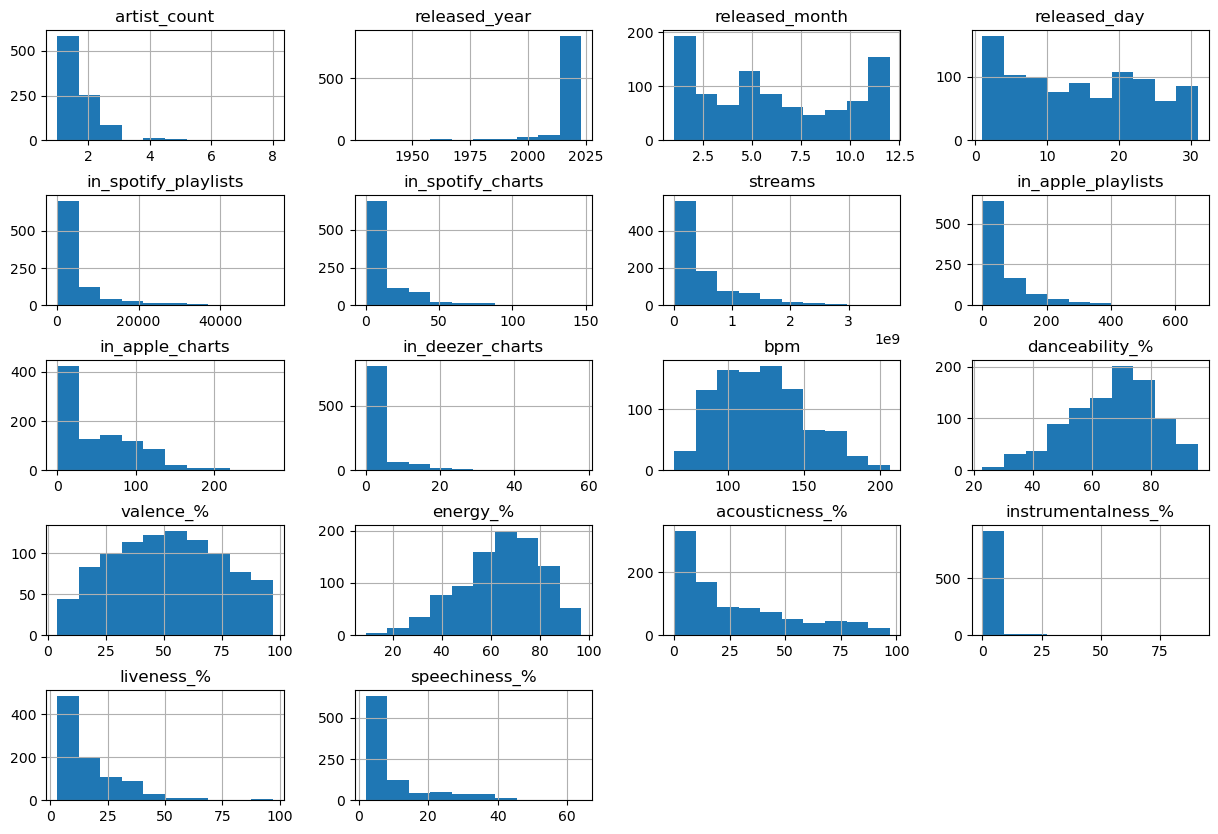

In [208]:
#histogram of each numeric feature 
df.hist(figsize =(15,10))
plt.subplots_adjust(hspace=0.5);

#what features could be of concern? 
    #drop rows where the released_year is in the 1960s
    #released_day may not be needed 
    #streams are in the millions 
    #instrumentalness may need to be dropped, too many 0 values 


In [211]:
df.select_dtypes('object')

,track_name,artist(s)_name,in_deezer_playlists,in_shazam_charts,key,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",45,826,B,Major
1,LALA,Myke Towers,58,382,C#,Major
2,vampire,Olivia Rodrigo,91,949,F,Major
3,Cruel Summer,Taylor Swift,125,548,A,Major
4,WHERE SHE GOES,Bad Bunny,87,425,A,Minor
...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,37,0,A,Major
949,Bigger Than The Whole Sky,Taylor Swift,8,0,F#,Major
950,A Veces (feat. Feid),"Feid, Paulo Londra",7,0,C#,Major
951,En La De Ella,"Feid, Sech, Jhayco",17,0,C#,Major


In [ ]:
#relationship between in spotify playlists or streams and speechiness, energy, danceability, bpm
#top 20 tracks (based on number of streams and in playlists, in charts)
#lowest 20 tracks , compare the speechiness, energy, danceability, bpm between lowest and highest tracks  

In [214]:
df['instrumentalness_%'].value_counts()
#most tracks have vocals , therefore majority of the songs have an instrumentalness percent of 0 

instrumentalness_%
0     865
1      21
2       7
4       5
3       4
5       4
18      3
6       3
9       3
63      3
10      2
24      2
8       2
13      2
51      2
19      1
17      1
46      1
25      1
35      1
47      1
12      1
90      1
41      1
23      1
20      1
30      1
15      1
91      1
27      1
72      1
42      1
14      1
44      1
11      1
61      1
83      1
22      1
33      1
Name: count, dtype: int64

In [241]:
df['in_deezer_playlists'].value_counts()

in_deezer_playlists
0        24
15       23
5        20
13       20
8        18
         ..
2,655     1
4,053     1
169       1
695       1
544       1
Name: count, Length: 348, dtype: int64

In [216]:
df['released_year'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    object


In [243]:
#drop column 'in_deezer_charts', 'in_shazam_charts', 'in_spotify_charts', 'in_apple_charts' because charts are updated frequently
#some songs may have been in the charts in the past, but not when the data was collected 
df.drop(['in_deezer_charts', 'in_shazam_charts', 'in_spotify_charts', 'in_apple_charts'], axis=1, inplace=True)

In [244]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists', 'streams',
       'in_apple_playlists', 'in_deezer_playlists', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')